In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress # check if needed in end
import scipy.stats as stats
import seaborn as sns
import scipy.stats as st # check if needed in end



# Load and read file into dataframe
games_to_load = "csvfiles/game_addedgroup.csv"
games_df = pd.read_csv(games_to_load)
games_df.head()

,Unnamed: 0,name,number of platforms,platforms,number of stores,stores,number of genres,genres,tags,release date,...,rating count,metacritic score,added,month,yet,owned,beaten,toplay,dropped,playing
0,0,The Witcher 3: Wild Hunt,4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",3,"['Adventure', 'Action', 'RPG']","['Full controller support', 'Action RPG', 'Atm...",2015-05-18,...,3461,93,"{'yet': 558, 'owned': 6109, 'beaten': 2395, 't...",5,558,6109,2395,455,421,588
1,1,Life is Strange,9,"['PC', 'PlayStation', 'Xbox', 'iOS', 'Android'...",7,"['Steam', 'PlayStation Store', 'Xbox Store', '...",1,['Adventure'],"['Full controller support', 'Atmospheric', 'Ch...",2015-01-29,...,2211,83,"{'yet': 462, 'owned': 6136, 'beaten': 1903, 't...",1,462,6136,1903,184,339,123
2,2,Red Dead Redemption 2,3,"['PC', 'PlayStation', 'Xbox']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",3,"['Adventure', 'Action', 'RPG']","['In-App Purchases', 'America', 'Partial Contr...",2018-10-26,...,2533,96,"{'yet': 398, 'owned': 4197, 'beaten': 1253, 't...",10,398,4197,1253,1140,217,584
3,3,DOOM (2016),4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",2,"['Shooter', 'Action']","['Partial Controller Support', 'Steam Achievem...",2016-05-13,...,2171,85,"{'yet': 314, 'owned': 4828, 'beaten': 1518, 't...",5,314,4828,1518,319,368,221
4,4,Fallout 4,3,"['PC', 'PlayStation', 'Xbox']",3,"['Steam', 'PlayStation Store', 'Xbox Store']",2,"['Action', 'RPG']","['Full controller support', 'Action RPG', 'Ste...",2015-11-09,...,1984,84,"{'yet': 292, 'owned': 4821, 'beaten': 1229, 't...",11,292,4821,1229,225,727,224


In [2]:
games_df.rename(columns = {"Unnamed: 0":"game count"}, inplace = True)
games_df["release date"]= pd.to_datetime(games_df["release date"])
games_df.head()

,game count,name,number of platforms,platforms,number of stores,stores,number of genres,genres,tags,release date,...,rating count,metacritic score,added,month,yet,owned,beaten,toplay,dropped,playing
0,0,The Witcher 3: Wild Hunt,4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",3,"['Adventure', 'Action', 'RPG']","['Full controller support', 'Action RPG', 'Atm...",2015-05-18,...,3461,93,"{'yet': 558, 'owned': 6109, 'beaten': 2395, 't...",5,558,6109,2395,455,421,588
1,1,Life is Strange,9,"['PC', 'PlayStation', 'Xbox', 'iOS', 'Android'...",7,"['Steam', 'PlayStation Store', 'Xbox Store', '...",1,['Adventure'],"['Full controller support', 'Atmospheric', 'Ch...",2015-01-29,...,2211,83,"{'yet': 462, 'owned': 6136, 'beaten': 1903, 't...",1,462,6136,1903,184,339,123
2,2,Red Dead Redemption 2,3,"['PC', 'PlayStation', 'Xbox']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",3,"['Adventure', 'Action', 'RPG']","['In-App Purchases', 'America', 'Partial Contr...",2018-10-26,...,2533,96,"{'yet': 398, 'owned': 4197, 'beaten': 1253, 't...",10,398,4197,1253,1140,217,584
3,3,DOOM (2016),4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",2,"['Shooter', 'Action']","['Partial Controller Support', 'Steam Achievem...",2016-05-13,...,2171,85,"{'yet': 314, 'owned': 4828, 'beaten': 1518, 't...",5,314,4828,1518,319,368,221
4,4,Fallout 4,3,"['PC', 'PlayStation', 'Xbox']",3,"['Steam', 'PlayStation Store', 'Xbox Store']",2,"['Action', 'RPG']","['Full controller support', 'Action RPG', 'Ste...",2015-11-09,...,1984,84,"{'yet': 292, 'owned': 4821, 'beaten': 1229, 't...",11,292,4821,1229,225,727,224


In [3]:
sum_colmns = ["owned", "playing", "beaten"]
sum_colmns
games_df["users"] = games_df[sum_colmns].sum(axis=1)
games_df

,game count,name,number of platforms,platforms,number of stores,stores,number of genres,genres,tags,release date,...,metacritic score,added,month,yet,owned,beaten,toplay,dropped,playing,users
0,0,The Witcher 3: Wild Hunt,4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",3,"['Adventure', 'Action', 'RPG']","['Full controller support', 'Action RPG', 'Atm...",2015-05-18,...,93,"{'yet': 558, 'owned': 6109, 'beaten': 2395, 't...",5,558,6109,2395,455,421,588,9092
1,1,Life is Strange,9,"['PC', 'PlayStation', 'Xbox', 'iOS', 'Android'...",7,"['Steam', 'PlayStation Store', 'Xbox Store', '...",1,['Adventure'],"['Full controller support', 'Atmospheric', 'Ch...",2015-01-29,...,83,"{'yet': 462, 'owned': 6136, 'beaten': 1903, 't...",1,462,6136,1903,184,339,123,8162
2,2,Red Dead Redemption 2,3,"['PC', 'PlayStation', 'Xbox']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",3,"['Adventure', 'Action', 'RPG']","['In-App Purchases', 'America', 'Partial Contr...",2018-10-26,...,96,"{'yet': 398, 'owned': 4197, 'beaten': 1253, 't...",10,398,4197,1253,1140,217,584,6034
3,3,DOOM (2016),4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",2,"['Shooter', 'Action']","['Partial Controller Support', 'Steam Achievem...",2016-05-13,...,85,"{'yet': 314, 'owned': 4828, 'beaten': 1518, 't...",5,314,4828,1518,319,368,221,6567
4,4,Fallout 4,3,"['PC', 'PlayStation', 'Xbox']",3,"['Steam', 'PlayStation Store', 'Xbox Store']",2,"['Action', 'RPG']","['Full controller support', 'Action RPG', 'Ste...",2015-11-09,...,84,"{'yet': 292, 'owned': 4821, 'beaten': 1229, 't...",11,292,4821,1229,225,727,224,6274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,1175,Ever Oasis,1,['Nintendo'],1,['Nintendo Store'],2,"['Action', 'RPG']","['role-playing', 'exclusive', 'true exclusive']",2017-06-23,...,78,"{'yet': 4, 'owned': 2, 'beaten': 9, 'toplay': ...",6,4,2,9,9,2,1,12
1176,1176,FRAMED 2,2,"['iOS', 'Android']",2,"['App Store', 'Google Play']",2,"['Adventure', 'Puzzle']","['Story', 'ship']",2017-06-14,...,89,"{'yet': 1, 'owned': 7, 'beaten': 10, 'toplay':...",6,1,7,10,7,1,0,17
1177,1177,CATS: Crash Arena Turbo Stars (C.A.T.S.),2,"['iOS', 'Android']",2,"['App Store', 'Google Play']",3,"['Casual', 'Arcade', 'Action']","['Asynchronous Multiplayer', 'Cute']",2017-04-19,...,78,"{'yet': 1, 'owned': 5, 'beaten': 3, 'dropped':...",4,1,5,3,0,11,5,13
1178,1178,Far Cry 5 - Lost On Mars,3,"['PC', 'PlayStation', 'Xbox']",3,"['Steam', 'PlayStation Store', 'Xbox Store']",2,"['Adventure', 'Action']","['Mars', 'Space', 'Story', 'gun', 'Gravity', '...",2018-07-17,...,59,"{'yet': 2, 'owned': 5, 'beaten': 7, 'toplay': ...",7,2,5,7,10,1,0,12


In [4]:
games_df["year"] = games_df["release date"].dt.year
games_df.dtypes


game count                      int64
name                           object
number of platforms             int64
platforms                      object
number of stores                int64
stores                         object
number of genres                int64
genres                         object
tags                           object
release date           datetime64[ns]
rating                        float64
max rating                      int64
rating count                    int64
metacritic score                int64
added                          object
month                           int64
yet                             int64
owned                           int64
beaten                          int64
toplay                          int64
dropped                         int64
playing                         int64
users                           int64
year                            int64
dtype: object

In [5]:
games_df.describe()


,game count,number of platforms,number of stores,number of genres,rating,max rating,rating count,metacritic score,month,yet,owned,beaten,toplay,dropped,playing,users,year
count,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000
mean,589.500000,3.572881,3.131356,2.666102,3.543314,3.806780,190.725424,74.924576,6.427119,56.562712,694.395763,101.517797,54.009322,54.861864,24.965254,820.878814,2016.627966
std,340.780966,1.836565,1.614355,1.139336,0.569947,0.832924,334.610524,9.540161,3.300954,74.149280,862.028791,227.300332,110.761306,89.851033,55.361022,1073.614551,1.352809
min,0.000000,1.000000,1.000000,1.000000,1.290000,1.000000,5.000000,27.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2015.000000
25%,294.750000,2.000000,2.000000,2.000000,3.190000,4.000000,20.000000,70.000000,3.000000,10.000000,137.000000,6.000000,3.000000,7.000000,1.000000,160.000000,2015.000000
50%,589.500000,3.000000,3.000000,3.000000,3.570000,4.000000,59.000000,76.000000,7.000000,29.000000,389.500000,22.000000,12.500000,20.000000,5.000000,439.000000,2016.000000
75%,884.250000,5.000000,4.000000,3.000000,3.990000,4.000000,201.500000,81.000000,9.000000,70.000000,885.000000,84.000000,50.000000,63.250000,22.000000,982.250000,2018.000000
max,1179.000000,12.000000,8.000000,7.000000,4.760000,5.000000,3461.000000,97.000000,12.000000,558.000000,6136.000000,2395.000000,1140.000000,727.000000,588.000000,9092.000000,2019.000000


In [6]:
corr = games_df.corr()
corr.style.background_gradient(cmap='coolwarm')


,game count,number of platforms,number of stores,number of genres,rating,max rating,rating count,metacritic score,month,yet,owned,beaten,toplay,dropped,playing,users,year
game count,1.000000,-0.249928,-0.284842,-0.060896,-0.239499,-0.194539,-0.649542,-0.363652,0.002264,-0.736172,-0.793095,-0.532334,-0.468678,-0.650494,-0.502551,-0.775410,0.109225
number of platforms,-0.249928,1.000000,0.795349,0.283628,0.023572,0.015867,0.079434,0.041825,-0.001082,0.188903,0.184253,0.044695,-0.027892,0.160368,0.031295,0.159017,-0.114536
number of stores,-0.284842,0.795349,1.000000,0.303319,0.068507,0.048538,0.131784,0.027244,0.035302,0.269154,0.201594,0.101933,0.090224,0.182126,0.071893,0.187152,0.039484
number of genres,-0.060896,0.283628,0.303319,1.000000,-0.146388,-0.118094,-0.086806,-0.062560,-0.024969,-0.028024,-0.015785,-0.105434,-0.092156,-0.028414,-0.060589,-0.038120,-0.108729
rating,-0.239499,0.023572,0.068507,-0.146388,1.000000,0.794188,0.367757,0.612413,0.045417,0.292839,0.206236,0.381946,0.394451,0.215038,0.383052,0.266207,0.186630
max rating,-0.194539,0.015867,0.048538,-0.118094,0.794188,1.000000,0.273479,0.501121,0.032510,0.247052,0.164894,0.283940,0.293006,0.155692,0.288604,0.207393,0.122076
rating count,-0.649542,0.079434,0.131784,-0.086806,0.367757,0.273479,1.000000,0.365536,-0.006135,0.789630,0.851234,0.934408,0.684624,0.771076,0.814029,0.923278,-0.020026
metacritic score,-0.363652,0.041825,0.027244,-0.062560,0.612413,0.501121,0.365536,1.000000,0.043094,0.346258,0.291815,0.341225,0.339299,0.276503,0.385100,0.326405,0.090686
month,0.002264,-0.001082,0.035302,-0.024969,0.045417,0.032510,-0.006135,0.043094,1.000000,-0.024443,-0.002795,-0.016102,0.017437,0.008072,0.010464,-0.005114,-0.022127
yet,-0.736172,0.188903,0.269154,-0.028024,0.292839,0.247052,0.789630,0.346258,-0.024443,1.000000,0.856053,0.726365,0.597405,0.638072,0.584834,0.871283,-0.060296


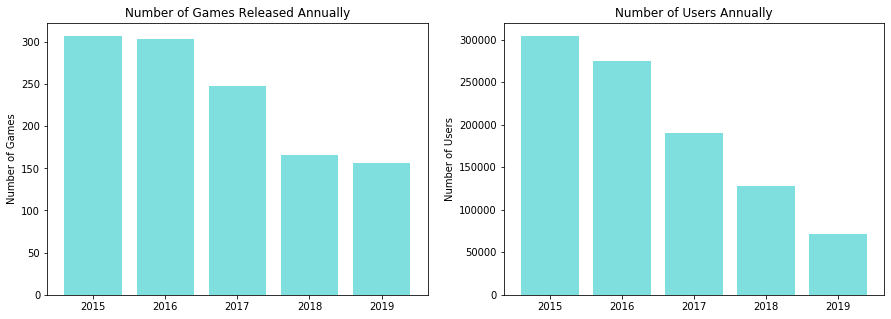

,Annual Number,F Statistic,P Value
0,Games released,4.381538,0.001608
1,Users,7.289474,0.000008


In [28]:
# Visualise category variables

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

# Generate a bar plot for total released each year

total = games_df.groupby(games_df["year"])["game count"].count()

axes[0].set_title("Number of Games Released Annually")
axes[0].set_ylabel("Number of Games")

totalgames = axes[0].bar(total.index, total, color='c', alpha=0.5)


# Generate a bar plot for total users each year
users = games_df.groupby(games_df["year"])["users"].sum()

axes[1].set_title("Number of Users Annually")
axes[1].set_ylabel("Number of Users")

users = axes[1].bar(users.index, users, color='c', alpha=0.5)

# Assign game count and rating years to variables for ANOVA

group1 = games_df[games_df["year"] == 2015]["month"]
group2 = games_df[games_df["year"] == 2016]["month"]
group3 = games_df[games_df["year"] == 2017]["month"]
group4 = games_df[games_df["year"] == 2018]["month"]
group5 = games_df[games_df["year"] == 2019]["month"]

group6 = games_df[games_df["year"] == 2015]["users"]
group7 = games_df[games_df["year"] == 2016]["users"]
group8 = games_df[games_df["year"] == 2017]["users"]
group9 = games_df[games_df["year"] == 2018]["users"]
group10 = games_df[games_df["year"] == 2019]["users"]


# Perform the ANOVA
anova_gc = stats.f_oneway(group1, group2, group3, group4, group5)
anova_r = stats.f_oneway(group6, group7, group8, group9, group10)

fstats = (anova_gc[0], anova_r[0])
pstats = (anova_gc[1], anova_r[1])
counts = ("Games released", "Users")

plt.show()

# Create and show dataframe
frame = {"Annual Number" : counts,"F Statistic": fstats, "P Value" : pstats} 
summary_df = pd.DataFrame(frame)

summary_df


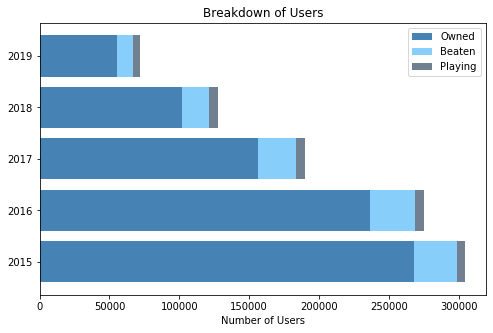

In [8]:
fig, ax = plt.subplots(figsize = (8,5))
years = games_df["year"].unique()
years.sort()

owned = games_df.groupby(games_df["year"]).owned.sum()
beaten = games_df.groupby(games_df["year"]).beaten.sum()
playing = games_df.groupby(games_df["year"]).playing.sum()
b = list(owned + beaten)

ax.barh(years, owned, color="steelblue")
ax.barh(years, beaten, left=owned, color="lightskyblue")
ax.barh(years, playing, left=b, color="slategrey")

ax.set_xlabel("Number of Users")
ax.set_title("Breakdown of Users")
ax.set_yticks(years, (years[0], years[1], years[2], years[3], years[4]))

ax.legend(labels=["Owned", "Beaten", "Playing"])

plt.show()



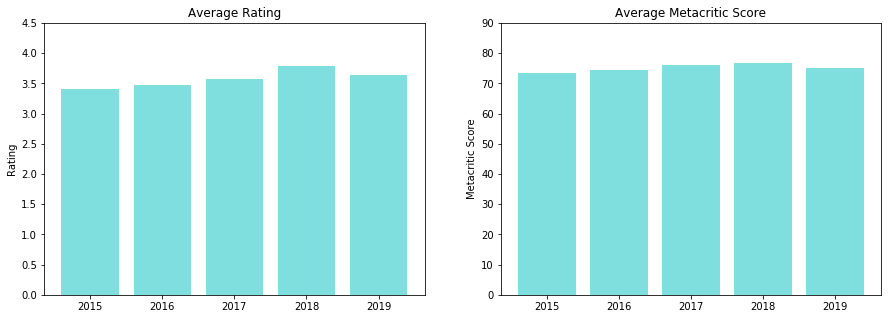

In [9]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

# Generate a bar plot for average rating each year
users = games_df.groupby(games_df["year"])["rating"].mean()
axes[0].set_title("Average Rating")
axes[0].set_ylim(top = 4.5)
axes[0].set_ylabel("Rating")

rating = axes[0].bar(users.index, users, color='c', alpha=0.5)

# Generate a bar plot for average metacritic score each year
users = games_df.groupby(games_df["year"])["metacritic score"].mean()

axes[1].set_title("Average Metacritic Score")
axes[1].set_ylim(top = 90)
axes[1].set_ylabel("Metacritic Score")

metascore = axes[1].bar(users.index, users, color='c', alpha=0.5)

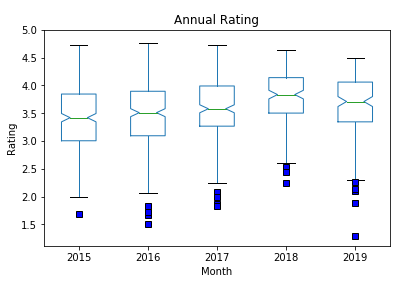

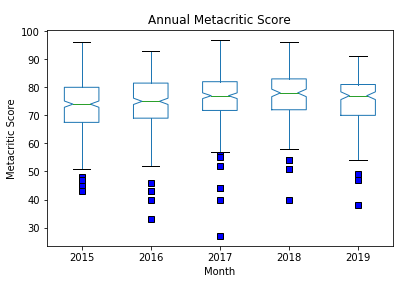

,Type,F Statistic,P Value
0,Metacritic Score,4.095017,2.664655e-03
1,User Rating,14.394861,1.768007e-11


In [10]:
# Generate a box plot for range of user ratings each year
blue_square = dict(markerfacecolor='b', marker='s')
years = games_df["year"].unique()
years.sort()

games_df.boxplot(column=["rating"], by="year", notch = True, 
                 labels = years, grid=False, flierprops=blue_square)

title_boxplot = "Annual Rating"
plt.xlabel("Month")
plt.ylabel("Rating")

plt.title(title_boxplot)
plt.ylim(top = 5)
plt.suptitle(" ")
plt.show()

# Perform ANOVA for user rating
group1 = games_df.loc[games_df["year"] == 2015]["rating"]
group2 = games_df.loc[games_df["year"] == 2016]["rating"]
group3 = games_df.loc[games_df["year"] == 2017]["rating"]
group4 = games_df.loc[games_df["year"] == 2018]["rating"]
group5 = games_df.loc[games_df["year"] == 2019]["rating"]

anova_r = stats.f_oneway(group1, group2, group3, group4, group5)

# Generate a box plot for range of metacritic scores each year
games_df.boxplot(column=["metacritic score"], by="year", notch = True, 
                 labels = years, grid=False, flierprops=blue_square)

title_boxplot = "Annual Metacritic Score"
plt.xlabel("Month")
plt.ylabel("Metacritic Score")

plt.title(title_boxplot)
plt.suptitle(" ")
plt.show()

# Perform ANOVA for metacritic score
group6 = games_df[games_df["year"] == 2015]["metacritic score"]
group7 = games_df[games_df["year"] == 2016]["metacritic score"]
group8 = games_df[games_df["year"] == 2017]["metacritic score"]
group9 = games_df[games_df["year"] == 2018]["metacritic score"]
group10 = games_df[games_df["year"] == 2019]["metacritic score"]

anova_m = stats.f_oneway(group6, group7, group8, group9, group10)

# Create and show dataframe
fstats = (anova_m[0], anova_r[0])
pstats = (anova_m[1], anova_r[1])
counts = ("Metacritic Score", "User Rating")


frame = {"Type" : counts,"F Statistic": fstats, "P Value" : pstats} 
summary_df = pd.DataFrame(frame)

summary_df


In [11]:
# Monthly spread of games by year

# Declare variables for loop
years = games_df["year"].unique()
years.sort()

month = games_df["month"].unique()
month.sort()

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul","Aug", "Sep","Oct","Nov","Dec"]

# Create empty dataframe 
month_games_df = pd.DataFrame(0, index=np.arange(len(month)+1), columns=years)

# Populate dataframe
for year in years:  
    current_yr = games_df.loc[games_df["year"] == year]
    month_games_df[year] = pd.DataFrame(current_yr.groupby(["month"])["game count"].count())
    
# Clean up dataframe    
month_games_df = month_games_df.dropna()
month_games_df["month"] = months
month_games_df = month_games_df[["month", 2015, 2016, 2017, 2018, 2019]]


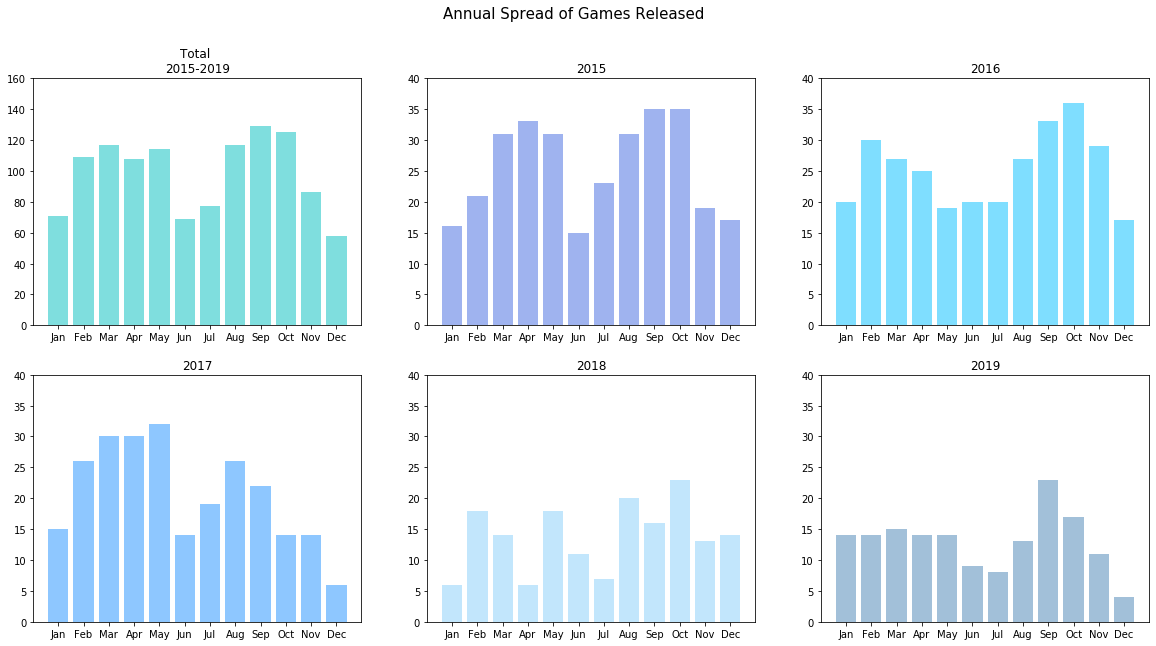

In [12]:
# Create plot
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10))
fig.suptitle("Annual Spread of Games Released", fontsize = 15 )

# Plot for all years
all_years = games_df.groupby(["month"])["game count"].count()
barplot0 = axes[0,0].bar(months, all_years, color='c', alpha=0.5)
axes[0,0].set_title('Total \n2015-2019')
axes[0,0].set_ylim(0,160)

year1 = month_games_df[2015]
barplot1 = axes[0,1].bar(months, year1, color='royalblue', alpha=0.5)
axes[0,1].set_title('2015')
axes[0,1].set_ylim(0,40)

year2 = month_games_df[2016]
barplot2 = axes[0,2].bar(months, year2, color='deepskyblue', alpha=0.5)
axes[0,2].set_title('2016')
axes[0,2].set_ylim(0,40)

year3 = month_games_df[2017]
barplot3 = axes[1,0].bar(months, year3, color='dodgerblue', alpha=0.5)
axes[1,0].set_title('2017')
axes[1,0].set_ylim(0,40)

year4 = month_games_df[2018]
barplot4 = axes[1,1].bar(months, year4, color='lightskyblue', alpha=0.5)
axes[1,1].set_title('2018')
axes[1,1].set_ylim(0,40)

year5 = month_games_df[2019]
barplot5 = axes[1,2].bar(months, year5, color='steelblue', alpha=0.5)
axes[1,2].set_title('2019')
axes[1,2].set_ylim(0,40)

plt.show()


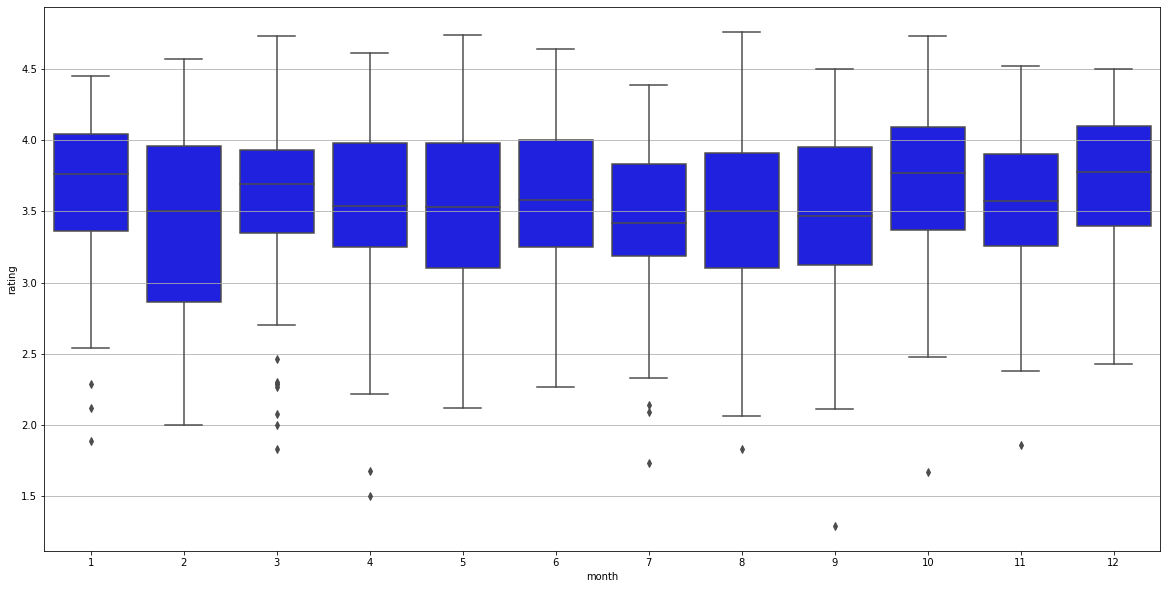

In [13]:
# Boxplot of user rating by all months

fig, ax = plt.subplots(figsize = (20,10))
ax.grid(b=True, which='major', axis='y')

sns.boxplot(
    data=games_df,
    x="month",
    y="rating",
    color='blue')

plt.show()


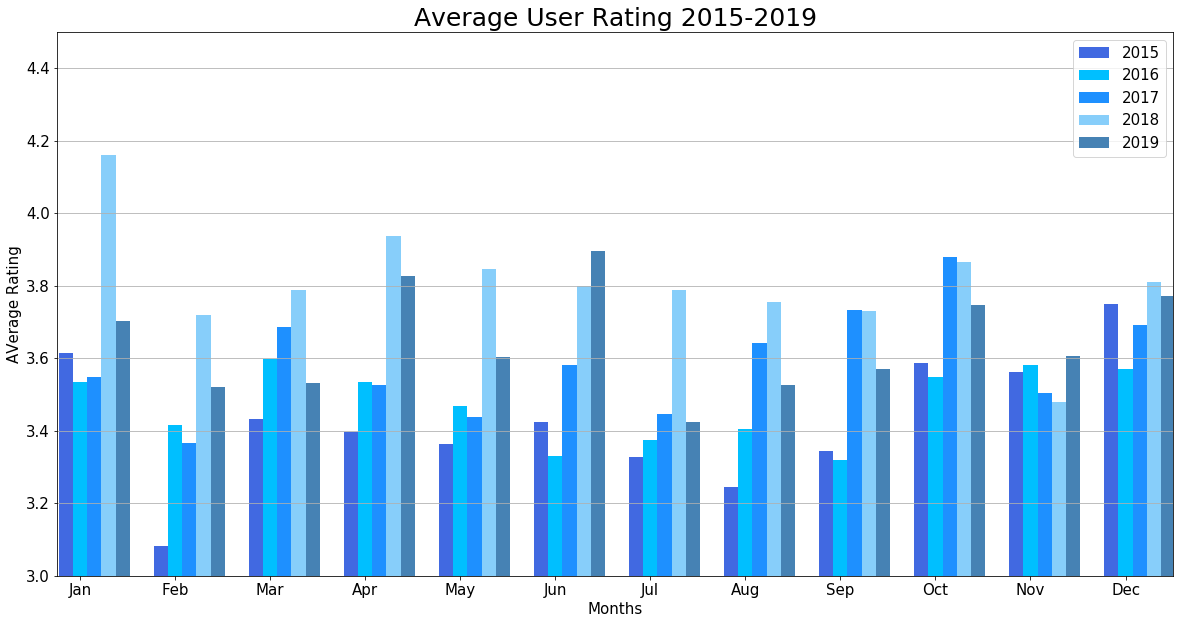

In [14]:
# Average User Rating by Year

# Declare variables for loop
years = games_df["year"].unique()
years.sort()

# Create empty dataframe
mthlyrating_df = pd.DataFrame(0, index=np.arange(len(months)+1), columns=years)

# Populate dataframe
for year in years:  
    current_yr = games_df.loc[games_df["year"] == year]
    mthlyrating_df[year] = pd.DataFrame(current_yr.groupby(["month"])["rating"].mean())

    
# Clean up dataframe
mthlyrating_df = mthlyrating_df.dropna()    
mthlyrating_df["month"] = months
mthlyrating_df = mthlyrating_df[["month", 2015, 2016, 2017, 2018, 2019]]

# Create series for each year in bar plot
index = np.arange(12)
rating1 = mthlyrating_df[2015]
rating2 = mthlyrating_df[2016]
rating3 = mthlyrating_df[2017]
rating4 = mthlyrating_df[2018]
rating5 = mthlyrating_df[2019]

# Create plot
fig, ax = plt.subplots(figsize = (20,10))
ax.grid(b=True, which='major', axis='y')

# Plot bars for each year
year1 = ax.bar(index, rating1, 0.15, label="2015", color = "royalblue")
year2 = ax.bar(index + 0.15, rating2, 0.15, label="2016", color = "deepskyblue")
year3 = ax.bar(index + 0.30, rating3, 0.15, label="2017", color= "dodgerblue" )
year4 = ax.bar(index + 0.45, rating4, 0.15, label="2018", color= "lightskyblue")
year5 = ax.bar(index + 0.60, rating5, 0.15, label="2019", color= "steelblue")

plt.title("Average User Rating 2015-2019",fontsize=25)

plt.xlabel('Months',fontsize=15)
plt.ylabel('AVerage Rating',fontsize=15)

plt.xticks(index + 0.15, months,fontsize=15)
plt.yticks(fontsize=15)

plt.xlim(-.09,11.65)
plt.ylim(3,4.5)

plt.legend(fontsize=15)

plt.show()


In [15]:
mth_rating_df = games_df[["month", "rating"]]
mth_rating_df


,month,rating
0,5,4.67
1,1,4.10
2,10,4.56
3,5,4.39
4,11,3.75
...,...,...
1175,6,3.88
1176,6,3.78
1177,4,3.79
1178,7,3.57


In [16]:
#  Generate summary statistics for mean, median, variance, standard deviation, and SEM for monthly ratings
means = mth_rating_df.groupby(["month"])["rating"].mean()
medians = mth_rating_df.groupby(["month"])["rating"].median()
stds = mth_rating_df.groupby(["month"])["rating"].std()
vars = mth_rating_df.groupby(["month"])["rating"].var()
sems = mth_rating_df.groupby(["month"])["rating"].sem()

# Create dataframe
frame = {"Month": months, "Mean": means, "Median": medians, "Std Dev": stds,"Variance": vars,"SEM": sems} 
summary = pd.DataFrame(frame) 

# Reformat output for display
summary["Mean"] = summary['Mean'].map("{:,.2f}".format)
summary["Median"] = summary["Median"].map("{:,.2f}".format)
summary["Std Dev"] = summary["Std Dev"].map("{:,.2f}".format)
summary["Variance"] = summary["Variance"].map("{:,.2f}".format)
summary["SEM"] = summary["SEM"].map("{:,.2f}".format)

print(summary)


      Month  Mean Median Std Dev Variance   SEM
month                                          
1       Jan  3.64   3.76    0.59     0.35  0.07
2       Feb  3.40   3.50    0.65     0.42  0.06
3       Mar  3.59   3.69    0.56     0.31  0.05
4       Apr  3.55   3.54    0.58     0.34  0.06
5       May  3.51   3.53    0.59     0.35  0.06
6       Jun  3.55   3.58    0.53     0.28  0.06
7       Jul  3.42   3.42    0.56     0.32  0.06
8       Aug  3.49   3.50    0.56     0.31  0.05
9       Sep  3.49   3.47    0.58     0.34  0.05
10      Oct  3.68   3.77    0.52     0.27  0.05
11      Nov  3.55   3.57    0.53     0.28  0.06
12      Dec  3.71   3.77    0.48     0.23  0.06


In [17]:
timeprd_rating_df = games_df[["year","month", "rating"]]
timeprd_rating_df = timeprd_rating_df.groupby(["year","month"])["rating"].mean()


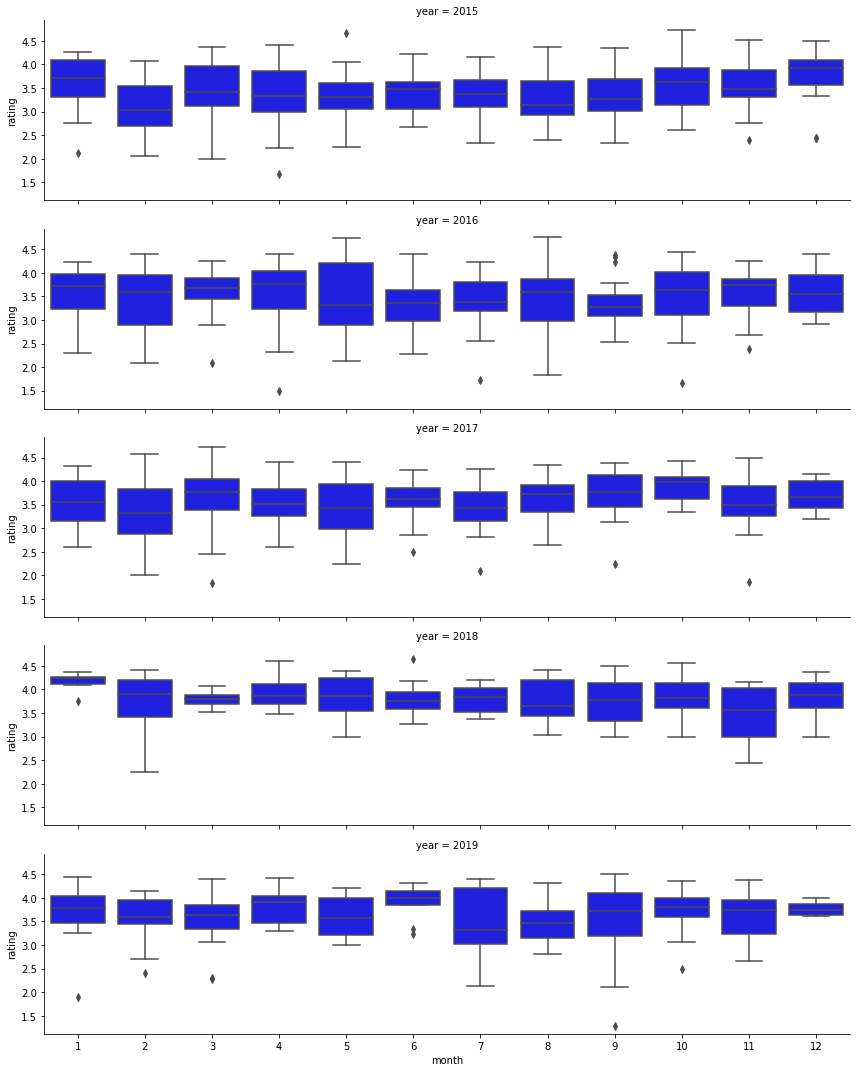

In [18]:
sns.catplot(
    data=games_df,
    x="month",
    y="rating",
    row="year",
    kind='box',
    height=3, 
    aspect=4,
    color='blue')


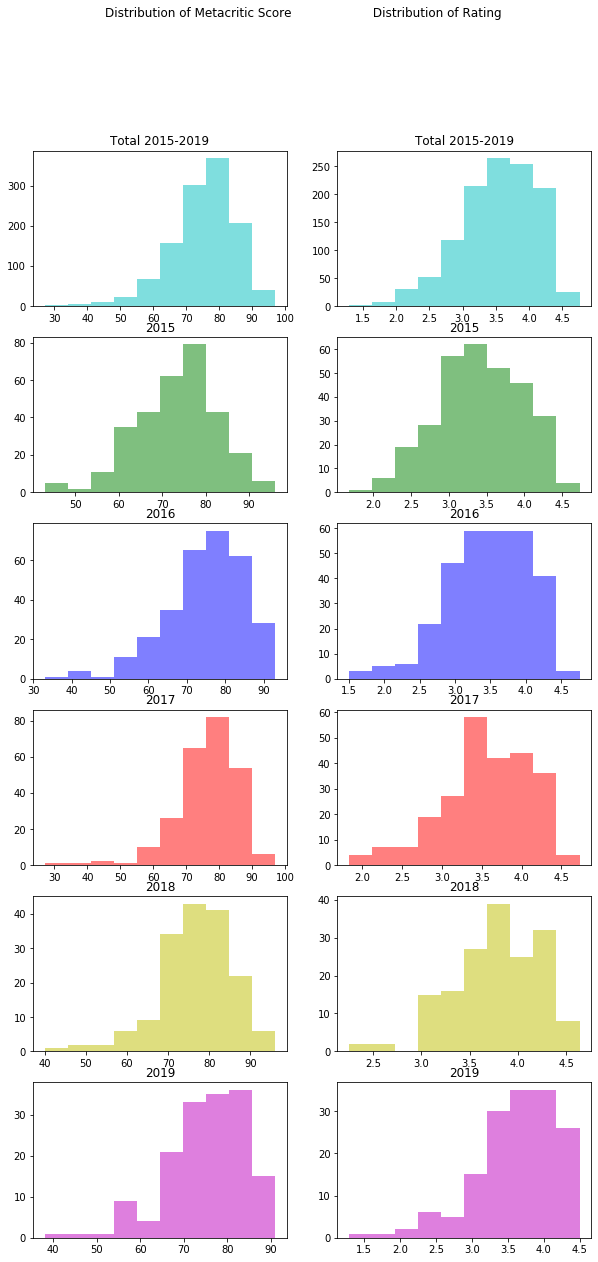

In [19]:
# Visualize metacritic score:
fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (10,20))
fig.suptitle("Distribution of Metacritic Score                     Distribution of Rating")


x00 = games_df['metacritic score']
x01 = games_df['rating']
x10 = games_df.loc[games_df["year"] == 2015]['metacritic score']
x11 = games_df.loc[games_df["year"] == 2015]['rating']
x20 = games_df.loc[games_df["year"] == 2016]['metacritic score']
x21 = games_df.loc[games_df["year"] == 2016]['rating']
x30 = games_df.loc[games_df["year"] == 2017]['metacritic score']
x31 = games_df.loc[games_df["year"] == 2017]['rating']
x40 = games_df.loc[games_df["year"] == 2018]['metacritic score']
x41 = games_df.loc[games_df["year"] == 2018]['rating']
x50 = games_df.loc[games_df["year"] == 2019]['metacritic score']
x51 = games_df.loc[games_df["year"] == 2019]['rating']


barplot00 = axes[0,0].hist(x00, alpha=0.5, bins=10, color='c', label="Total")
axes[0,0].set_title("Total 2015-2019")
barplot01 = axes[0,1].hist(x01, alpha=0.5, bins=10, color='c', label="Total")
axes[0,1].set_title("Total 2015-2019")

barplot10 = axes[1,0].hist(x10, alpha=0.5, bins=10, color='g', label="2015")
axes[1,0].set_title("2015")
barplot11 = axes[1,1].hist(x11, alpha=0.5, bins=10, color='g', label="2015")
axes[1,1].set_title("2015")


barplot20 = axes[2,0].hist(x20, alpha=0.5, bins=10, color='b', label="2016")
axes[2,0].set_title("2016")
barplot21 = axes[2,1].hist(x21, alpha=0.5, bins=10, color='b', label="2016")
axes[2,1].set_title("2016")

barplot30 = axes[3,0].hist(x30, alpha=0.5, bins=10, color='r', label="2017")
axes[3,0].set_title("2017")
barplot31 = axes[3,1].hist(x31, alpha=0.5, bins=10, color='r', label="2017")
axes[3,1].set_title("2017")

barplot40 = axes[4,0].hist(x40, alpha=0.5, bins=10, color='y', label="2018")
axes[4,0].set_title("2018")
barplot41 = axes[4,1].hist(x41, alpha=0.5, bins=10, color='y', label="2018")
axes[4,1].set_title("2018")

barplot50 = axes[5,0].hist(x50, alpha=0.5, bins=10, color='m', label="2018")
axes[5,0].set_title("2019")
barplot51 = axes[5,1].hist(x51, alpha=0.5, bins=10, color='m', label="2018")
axes[5,1].set_title("2019")
 
#plt.tight_layout()    
plt.show()

